# Nobel Prize Winners (1900-2020)

# Presented by:
Eden Zarka
Elmaleh Shirel

<a id='section1'></a>

<h1 style="background-color: #FFFFFF; color: #0046d6; border-radius: 10px; text-align: center; padding-top: 10px; padding-bottom: 10px; font-family: 'Arial';">
    <img src="https://github.com/Shirelmaleh/new_project/raw/main/photo%20prix%20nobel.jpg" width="70%" height="20%" alt="Centered Image" />
</h1>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch
import matplotlib.patches as mpatches

In [2]:
import pandas as pd

url = "https://github.com/Shirelmaleh/new_project/raw/main/nobel_prize_by_winner.csv"

try:
    df = pd.read_csv(url)
except pd.errors.ParserError:
    print("Error reading CSV file. Trying alternative method...")
    # Implémentez votre méthode alternative pour lire le fichier CSV ici


In [3]:
df.shape

(972, 20)

In [4]:
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
len(df)

972

In [7]:
df.describe()

,id,year,share
count,972.000000,966.000000,966.000000
mean,471.365226,1970.145963,2.005176
std,275.012711,32.889742,0.930193
min,1.000000,1901.000000,1.000000
25%,230.750000,1947.000000,1.000000
50%,463.500000,1976.000000,2.000000
75%,720.250000,1999.000000,3.000000
max,934.000000,2016.000000,4.000000


In [8]:
df.columns

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country'],
      dtype='object')

df.info #a verifier

# Analyse Pays

We check the data associated with the countries to make sure that all the data is correct.  

In [9]:
all_country= df["country"].unique()

In [10]:
df[['country']].describe()

,country
count,714
unique,29
top,USA
freq,361


In [11]:
count_country= df[["country"]].value_counts()

In [12]:
#prepare data to check that everything works correctly for the graph
#1. check that we're selecting only a list of numbers and check its value: len
nobel_counts =list(count_country.values)
print(nobel_counts)
len(nobel_counts)

[361, 91, 51, 40, 26, 22, 18, 17, 11, 11, 9, 7, 6, 6, 6, 6, 5, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]


29

In [13]:
#2. Check that we select all 29 countries and check its length: len
name_country= list(count_country.index)
print(name_country)
len(name_country)

[('USA',), ('United Kingdom',), ('Germany',), ('France',), ('Federal Republic of Germany',), ('Switzerland',), ('Japan',), ('Sweden',), ('USSR',), ('the Netherlands',), ('Denmark',), ('Canada',), ('Belgium',), ('Austria',), ('Italy',), ('Australia',), ('Israel',), ('Norway',), ('Russia',), ('China',), ('Argentina',), ('Portugal',), ('Alsace (then Germany, now France)',), ('Spain',), ('Ireland',), ('Hungary',), ('Finland',), ('Czechoslovakia',), ('India',)]


29

C:\Users\shire\AppData\Local\Temp\ipykernel_29056\2054580580.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\shire\AppData\Local\Temp\ipykernel_29056\2054580580.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


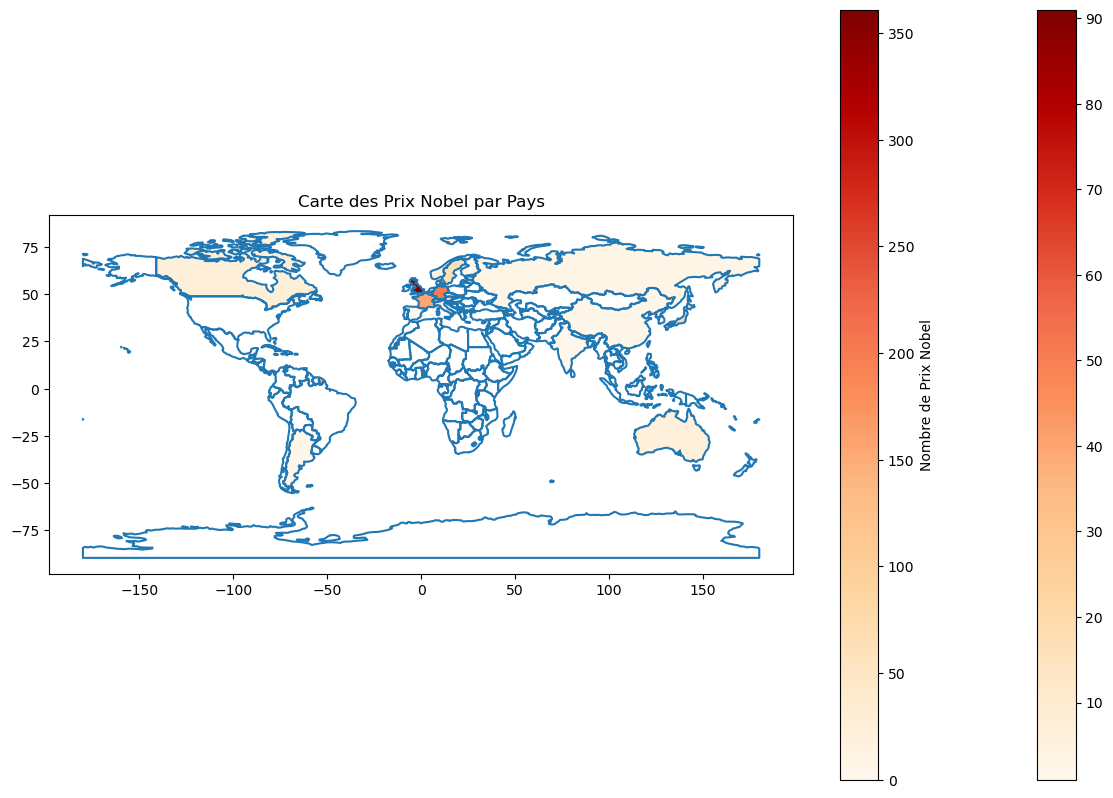

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Charger les données géographiques des pays
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Créer le DataFrame avec les données de Prix Nobel par pays
df_counts = pd.DataFrame()
df_counts['country'] = name_country
df_counts['nobel_count'] = nobel_counts

# Vérifier et ajuster les noms de pays si nécessaire
# Exemple de conversion si les noms de pays sont sous forme de tuples
df_counts['country'] = df_counts['country'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Trier le DataFrame par nobel_count pour avoir les pays les plus primés en premier
df_counts = df_counts.sort_values(by='nobel_count', ascending=False)

# Fusionner les données Nobel avec les données géographiques
world = world.merge(df_counts, left_on='name', right_on='country', how='left')

# Afficher la carte avec matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='nobel_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter une barre de couleurs
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=df_counts['nobel_count'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Nombre de Prix Nobel')

plt.title('Carte des Prix Nobel par Pays')
plt.show()



C:\Users\shire\AppData\Local\Temp\ipykernel_29056\1790154515.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\shire\AppData\Local\Temp\ipykernel_29056\1790154515.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


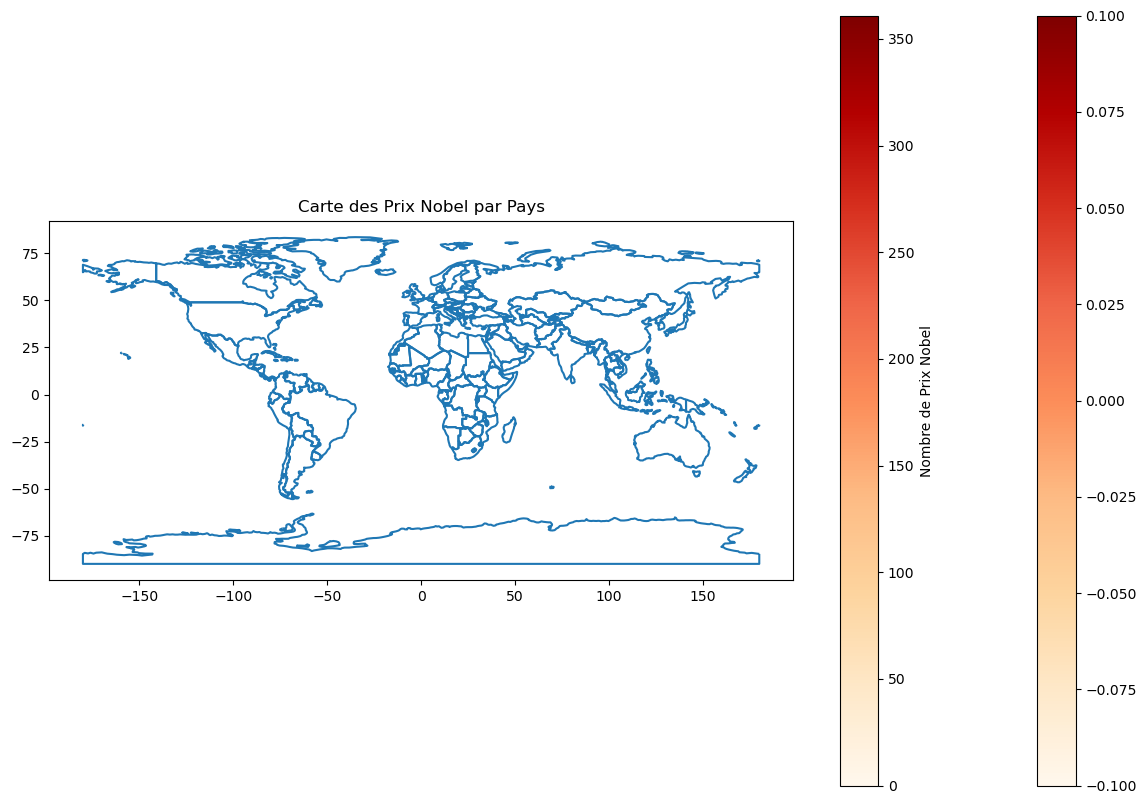

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
0

# Créer le DataFrame avec les données de Prix Nobel par pays
data_dict = {
    'country': name_country,
    'nobel_count': nobel_counts
}
df_counts = pd.DataFrame(data_dict)

# Trier le DataFrame par nobel_count pour avoir les pays les plus primés en premier
df_counts = df_counts.sort_values(by='nobel_count', ascending=False)

# Fusionner les données Nobel avec les données géographiques
world = world.merge(df_counts, left_on='name', right_on='country', how='left')

# Afficher la carte avec matplotlib
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='nobel_count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter une barre de couleurs
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=0, vmax=df_counts['nobel_count'].max()))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Nombre de Prix Nobel')

plt.title('Carte des Prix Nobel par Pays')
plt.show()


We can conclude that the United States has won the most Nobel Prizes. This map shows the power of each country.

Let's check the top 5 winners to see if they come from different countries. 

In [28]:
filter_USA = df['country'] == 'USA'

In [29]:
filter_bornUSA = df['bornCountry'] == 'USA'
filter_notbornUSA = df['bornCountry'] != 'USA'

In [31]:
filter_notBornUSA_winUSA= df[(df["bornCountry"] != "USA") & (df['country'] == 'USA')]
filter_bornUSA_winUSA = df[(df["bornCountry"] == "USA") & (df['country'] == 'USA')]

In [73]:
filter_notBornUSA_winUSA[['bornCountry']].describe()

,bornCountry
count,119
unique,45
top,United Kingdom
freq,16


In [79]:
count_nobel_born= filter_notBornUSA_winUSA[['bornCountry']].value_counts()

In [81]:
#resumer pour les USA chaque bornCountry a gagner combien de fois

list_name_nobel_born= list(count_nobel_born.index)
list_count_nobel_born= list(count_nobel_born.values)


In [53]:
nobel_counts_bornUSA= filter_bornUSA.sum()
nobel_counts_notbornUSA= filter_notbornUSA.sum()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
5,428,Barbara,McClintock,6/16/1902,9/2/1992,USA,US,"Hartford, CT",USA,US,"Huntington, NY",female,1983.0,medicine,NaN,1.0,"""for her discovery of mobile genetic elements""",Cold Spring Harbor Laboratory,"Cold Spring Harbor, NY",USA
13,610,Pearl,Buck,06/26/1892,3/6/1973,USA,US,"Hillsboro, WV",USA,US,"Danby, VT",female,1938.0,literature,NaN,1.0,"""for her rich and truly epic descriptions of p...",NaN,NaN,NaN
16,413,Rosalyn,Yalow,7/19/1921,5/30/2011,USA,US,"New York, NY",USA,US,"New York, NY",female,1977.0,medicine,NaN,2.0,"""for the development of radioimmunoassays of p...",Veterans Administration Hospital,"Bronx, NY",USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,470,Theodore,Roosevelt,10/27/1858,1/6/2019,USA,US,"New York, NY",USA,US,"Oyster Bay, NY",male,1906.0,peace,NaN,1.0,NaN,NaN,NaN,NaN
929,507,John Raleigh,Mott,05/25/1865,1/31/1955,USA,US,"Livingston Manor, NY",USA,US,NaN,male,1946.0,peace,NaN,2.0,NaN,NaN,NaN,NaN
930,489,Charles Gates,Dawes,08/27/1865,4/23/1951,USA,US,"Marietta, OH",USA,US,"Evanston, IL",male,1925.0,peace,NaN,2.0,NaN,NaN,NaN,NaN
933,505,Cordell,Hull,10/02/1871,7/23/1955,USA,US,"Olympus, TN",USA,US,"Bethesda, MD",male,1945.0,peace,NaN,1.0,NaN,NaN,NaN,NaN


In [57]:
nobel_counts_bornUSA = df[filter_bornUSA].groupby('country').size()
nobel_counts_notbornUSA = df[filter_notbornUSA].groupby('country').size()

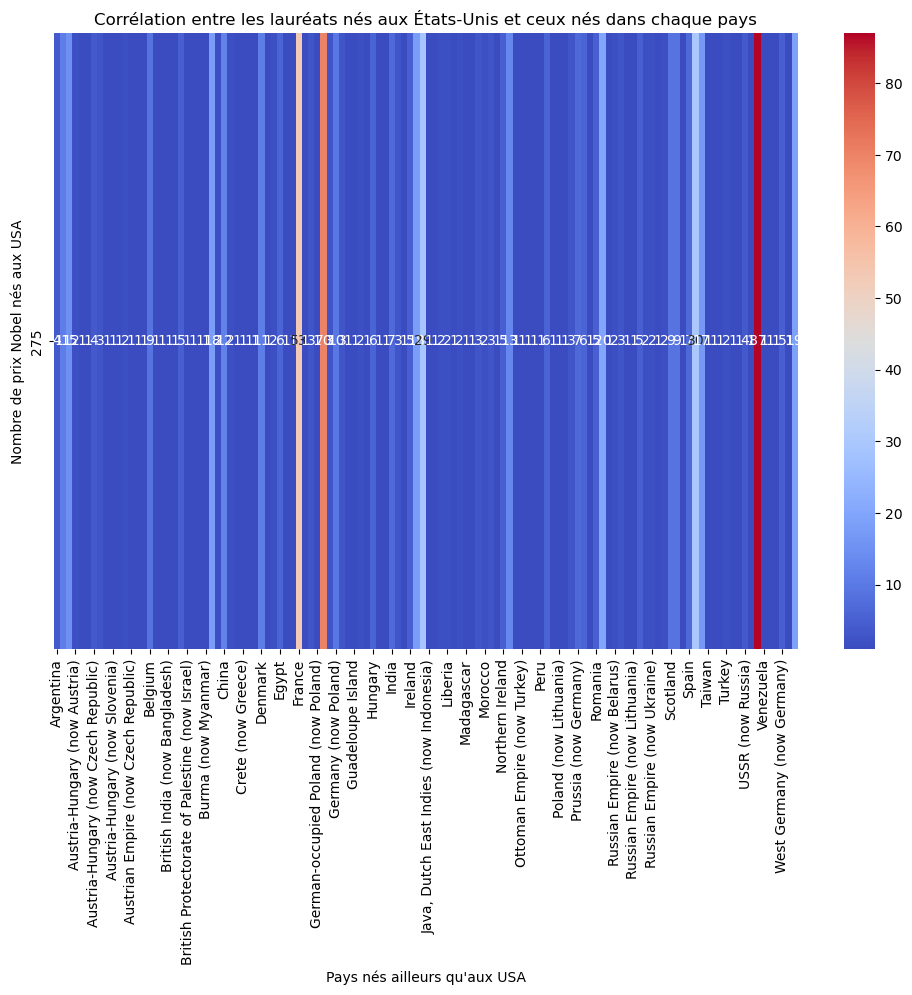

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les lauréats nés aux États-Unis
filter_bornUSA = df['bornCountry'] == 'USA'
df_bornUSA = df[filter_bornUSA]

# Filtrer les lauréats nés ailleurs qu'aux États-Unis
filter_notbornUSA = df['bornCountry'] != 'USA'
df_notbornUSA = df[filter_notbornUSA]

# Compter le nombre de lauréats par pays de naissance pour ceux nés ailleurs qu'aux États-Unis
nobel_counts_notBornUSA = df_notbornUSA['bornCountry'].value_counts()

# Créer un DataFrame pour les résultats
df_notBornUSA_summary = pd.DataFrame(nobel_counts_notBornUSA).reset_index()
df_notBornUSA_summary.columns = ['Pays', 'Nombre de prix Nobel']

# Compter le nombre de lauréats nés aux États-Unis
nobel_counts_bornUSA = df_bornUSA['bornCountry'].value_counts().get('USA', 0)

# Créer un DataFrame pour les corrélations
correlations = []

for country, count in nobel_counts_notBornUSA.items():
    correlations.append([country, count])

correlation_df = pd.DataFrame(correlations, columns=['Pays', 'Nombre de prix Nobel nés ailleurs'])

# Ajouter la colonne des prix Nobel nés aux USA
correlation_df['Nombre de prix Nobel nés aux USA'] = nobel_counts_bornUSA

# Création de la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_df.pivot(index='Nombre de prix Nobel nés aux USA', columns='Pays', values='Nombre de prix Nobel nés ailleurs'), annot=True, cmap='coolwarm', cbar=True)
plt.title('Corrélation entre les lauréats nés aux États-Unis et ceux nés dans chaque pays')
plt.xlabel('Pays nés ailleurs qu\'aux USA')
plt.ylabel('Nombre de prix Nobel nés aux USA')
plt.show()



In [75]:
countries_notbornUSA = nobel_counts_notBornUSA.index

# Création d'une liste des nombres de prix Nobel pour les personnes nées aux USA
nobel_counts_USA = [nobel_counts_bornUSA.get(country, 0) for country in countries_notbornUSA]

# Création de la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(data=pd.DataFrame({'Pays nés ailleurs qu\'aux USA': countries_notbornUSA,
                               'Prix Nobel USA': nobel_counts_USA}),
            xticklabels=True, yticklabels=True, annot=True, cmap='coolwarm', cbar=True)
plt.title('Prix Nobel des personnes nées aux États-Unis par pays né ailleurs')
plt.xlabel('Pays nés ailleurs qu\'aux USA')
plt.ylabel('Prix Nobel USA')
plt.show()

ValueError: could not convert string to float: 'Alsace (then Germany, now France)'

<Figure size 1200x800 with 0 Axes>

# Analyse Category

In [15]:
different_category= df['category'].unique()

In [16]:
all_category = df[['category']].value_counts()

In [17]:
df[['category']].describe()

,category
count,966
unique,6
top,medicine
freq,227


<Axes: title={'center': 'Different Category'}, ylabel='count'>

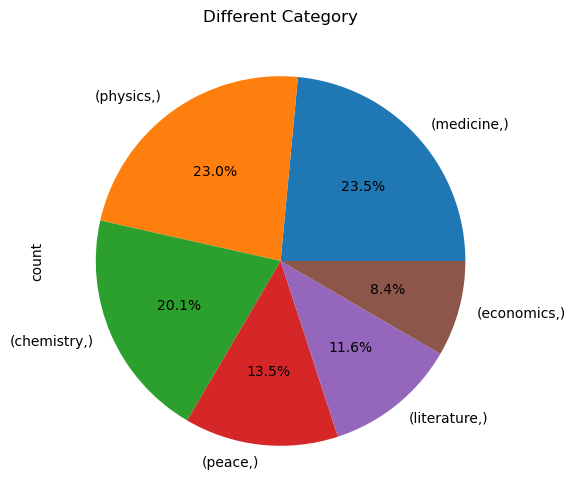

In [18]:
plt.figure(1, figsize=(6,6))
plt.title("Different Category")
all_category.plot.pie(autopct="%1.1f%%")

In [79]:
plt.figure(figsize=(4,6))
sns.countplot(data= df.category, x= "category")

ValueError: Could not interpret input 'category'

<Figure size 400x600 with 0 Axes>

In [1]:
plt.figure(figsize=(12, 8))
sns.barplot(y=all_country.index, x=country_counts.values, palette='viridis')
plt.title('Nombre de Prix Nobel par Pays de Naissance')
plt.xlabel('Nombre de Lauréats')
plt.ylabel('Pays')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
born=df.copy

# Analyse gender

In [21]:
df['gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [22]:
df[['gender']].describe()

,gender
count,972
unique,3
top,male
freq,896


In [23]:
df[['gender']].value_counts()

gender
male      896
female     50
org        26
Name: count, dtype: int64

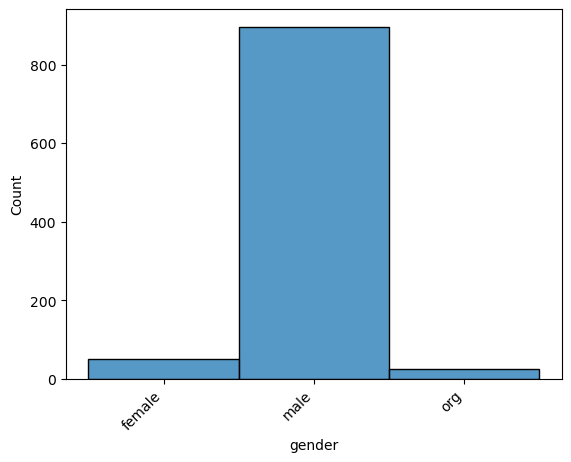

In [24]:
sns.histplot(data=df.gender, discrete=True)
plt.xticks(rotation=45, ha="right")
plt.show()

In [26]:
date_min = int(df["year"].min())

In [29]:
org= df["gender"]== "org"

In [31]:
df[(org)& (date_min)]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
946,925,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2015.0,peace,NaN,1.0,"""for its decisive contribution to the building...",NaN,NaN,NaN
947,893,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2013.0,peace,NaN,1.0,"""for its extensive efforts to eliminate chemic...",NaN,NaN,NaN
948,881,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2012.0,peace,NaN,1.0,"""for over six decades contributed to the advan...",NaN,NaN,NaN
949,818,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2007.0,peace,NaN,2.0,"""for their efforts to build up and disseminate...",NaN,NaN,NaN
950,810,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2006.0,peace,NaN,2.0,"""for their efforts to create economic and soci...",NaN,NaN,NaN
951,561,Pugwash Conferences on Science and World Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1995.0,peace,NaN,2.0,"""for their efforts to diminish the part played...",NaN,NaN,NaN
952,797,International Atomic Energy Agency (IAEA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2005.0,peace,NaN,2.0,"""for their efforts to prevent nuclear energy f...",NaN,NaN,NaN
953,748,United Nations (U.N.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,2001.0,peace,NaN,2.0,"""for their work for a better organized and mor...",NaN,NaN,NaN
954,564,International Campaign to Ban Landmines (ICBL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1997.0,peace,NaN,2.0,"""for their work for the banning and clearing o...",NaN,NaN,NaN
955,568,M_decins Sans Frontires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,org,1999.0,peace,NaN,1.0,"""in recognition of the organization's pioneeri...",NaN,NaN,NaN


In [ ]:
df["gender"]